In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
#libraries that will be used for data collection, storing, cleaning

In [2]:
raw_data=pd.read_csv('data.csv')  #reading in the raw data from the csv and stored into dataframe

/Users/raj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#cleaning the data

#dropping the duplicate and unwanted columns
after_dropped_data=raw_data.drop(columns=['Location','Updated On','X Coordinate','Y Coordinate']) #columns which are not necessary and are duplicates


#converting the date column from string to datetime
after_dropped_data['Date']=after_dropped_data['Date'].apply(lambda x:datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p'))
#counting for each column of how many null values are there
count=after_dropped_data.isna().sum() 

#getting the selected colums with null values and their count
def get_cols_withNan(series):      
    hasNaN_col=[]
    for index, value in series.items():
        if(value>0):
            hasNaN_col.append(index)
    return series[hasNaN_col]


#fixing the NaN data

# #total count of non null values
nonNull_columns= after_dropped_data.count()

# #total columns with null values
Columns_with_null=get_cols_withNan(count)

#comparing null vs non null
percent=(Columns_with_null/nonNull_columns)*100

#final dataframe with the data
columns={'Total Null':Columns_with_null,'Total Non-Null':nonNull_columns,'Percent':percent}
NullvsNonNull=pd.DataFrame(columns).dropna()

#from the table it is visible that what columns have nulls and their percents
print(NullvsNonNull)

after_dropped_data.info()


                      Total Null  Total Non-Null   Percent
Case Number                  4.0         7083777  0.000056
Community Area          613495.0         6470286  9.481729
District                    47.0         7083734  0.000663
Latitude                 67990.0         7015791  0.969100
Location Description      6320.0         7077461  0.089298
Longitude                67990.0         7015791  0.969100
Ward                    614828.0         6468953  9.504289
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083781 entries, 0 to 7083780
Data columns (total 18 columns):
ID                      int64
Case Number             object
Date                    datetime64[ns]
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Communit

In [4]:
# cleaniing the instances which have NaN

#it is visible that Column Ward has 9.50% and Column Area has 9.48% null values so I am dropping that column too.
after_dropped_data=after_dropped_data.drop(columns=['Community Area','Ward'])
#replacing null values
#district, location description set to unknown  and longitude-latitude set to chicago in general 
changeNaN={'Case Number':0,'District':'Unknown','Location Description':'Unknown','Latitude':41.8781,'Longitude':87.6298}
after_dropped_data.fillna(changeNaN,inplace=True)

after_dropped_data.notna().all()
#data has been prepared and cleaned now

ID                      True
Case Number             True
Date                    True
Block                   True
IUCR                    True
Primary Type            True
Description             True
Location Description    True
Arrest                  True
Domestic                True
Beat                    True
District                True
FBI Code                True
Year                    True
Latitude                True
Longitude               True
dtype: bool

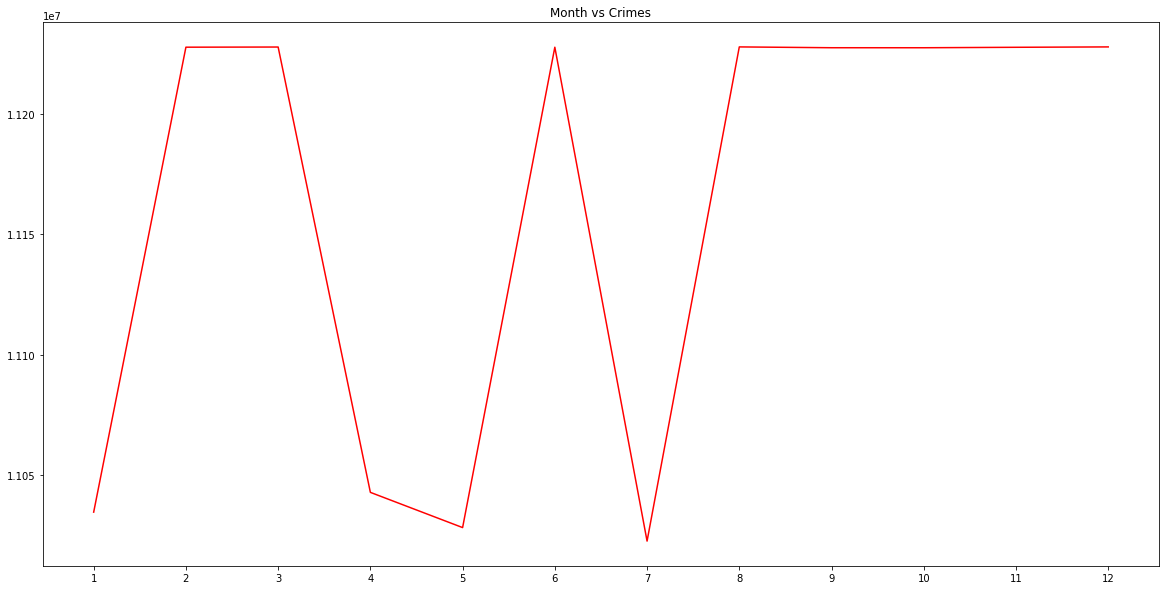

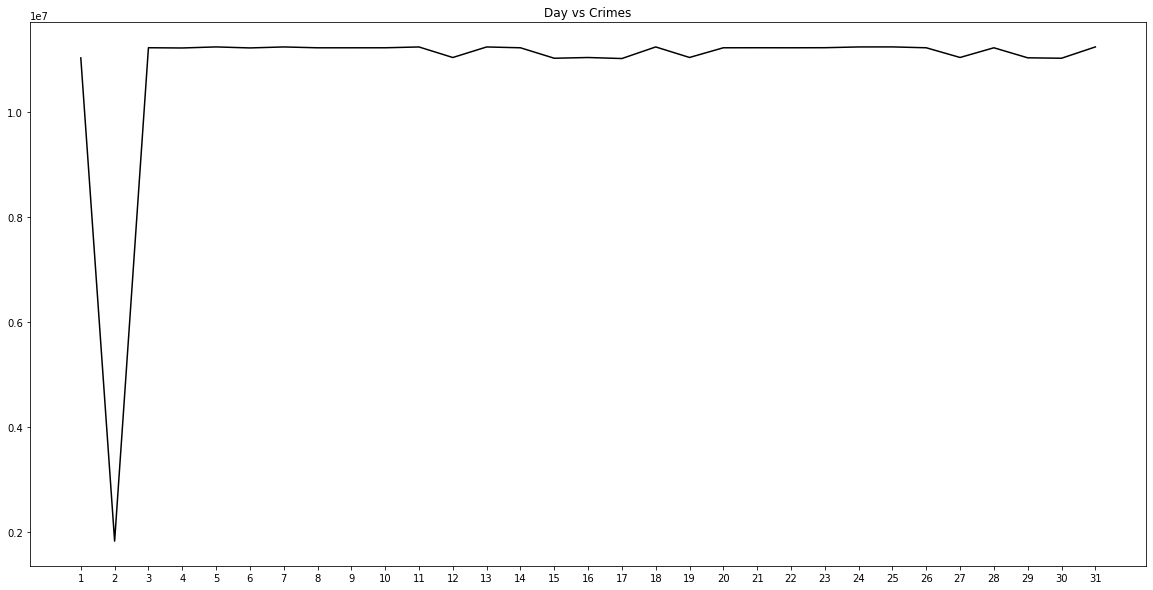

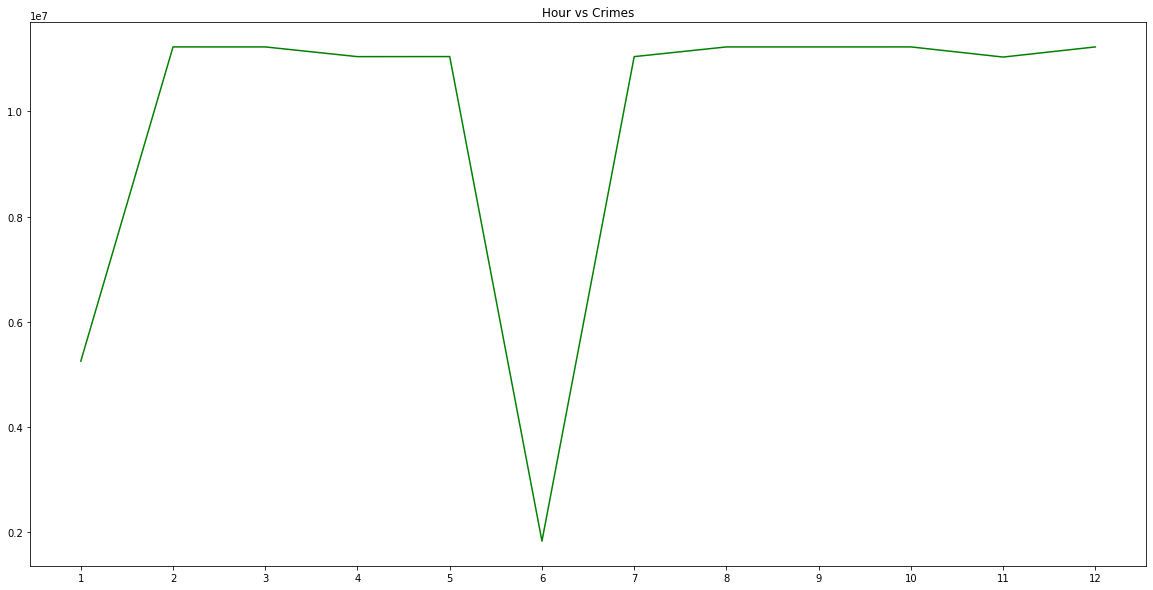

In [13]:
#Crime with time/date insights
months =after_dropped_data['Date'].dt.month
days=after_dropped_data['Date'].dt.day
hours=after_dropped_data['Date'].dt.hour
after_dropped_data['Day']=days
after_dropped_data['Hour']=hours
after_dropped_data['Month']=months
groupby_Month=after_dropped_data[['Month','ID']].groupby('Month')
groupby_Day=after_dropped_data[['Day','ID']].groupby('Day')
groupby_Hour=after_dropped_data[['Hour','ID']].groupby('Hour')
# groupby_month.first().plot(kind='line')
# groupby_Day.first().plot(kind='line',color='black')
# groupby_Hour.first().plot(kind='line',color='red')
# print(month_df)
def plotTimes(df,tl,colr): #takes in dataframe and makes the plot
    
    plt.figure(figsize=(20,10))
    plt.plot(df,color=colr)
    plt.title(tl)
    plt.xticks(np.arange(1,len(df)+1,1))
    plt.show()
    
plotTimes(groupby_Month.first(),'Month vs Crimes','red')
plotTimes(groupby_Day.first(),'Day vs Crimes','black')
plotTimes(groupby_Hour.first(),'Hour vs Crimes','green')
